In [119]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
pha_list = fits.open('3dhst.v4.1.4.full.v1.fits', memmap=True)
pha_list.info()

Filename: 3dhst.v4.1.4.full.v1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    352   207967R x 172C   [D, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, K, K, K, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 27A, D, D, D, D, D, D, D, D, D, K, D, 27A, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [120]:
print(pha_list[1].columns)

ColDefs(
    name = 'id'; format = 'D'
    name = 'field'; format = '7A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'z_peak'; format = 'D'
    name = 'faper_F140W'; format = 'D'
    name = 'eaper_F140W'; format = 'D'
    name = 'faper_F160W'; format = 'D'
    name = 'eaper_F160W'; format = 'D'
    name = 'f_F606W'; format = 'D'
    name = 'e_F606W'; format = 'D'
    name = 'f_F814W'; format = 'D'
    name = 'e_F814W'; format = 'D'
    name = 'f_F125W'; format = 'D'
    name = 'e_F125W'; format = 'D'
    name = 'f_F140W'; format = 'D'
    name = 'e_F140W'; format = 'D'
    name = 'f_F160W'; format = 'D'
    name = 'e_F160W'; format = 'D'
    name = 'tot_cor'; format = 'D'
    name = 'kron_radius'; format = 'D'
    name = 'a_image'; format = 'D'
    name = 'b_image'; format = 'D'
    name = 'flux_radius'; format = 'D'
    name = 'fwhm_image'; format = 'D'
    name = 'f

In [121]:
len(pha_list[1].columns)

172

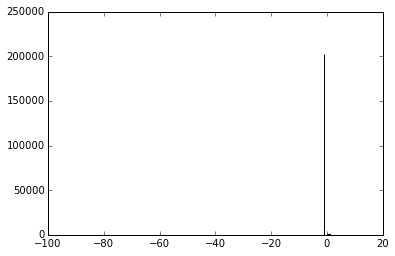

In [122]:
pha_data = pha_list[1].data
NBINS=500
z_hist = plt.hist(pha_data['z_spec'],NBINS)

In [123]:
from scipy import stats
stats.mode(pha_data['z_spec'])

(array([-1.]), array([ 202606.]))

In [124]:
import numpy.ma as ma
masked_z_spec= ma.masked_values(pha_data['z_spec'], -1.)
print stats.mode(masked_z_spec)

(array([-1.]), array([ 202606.]))


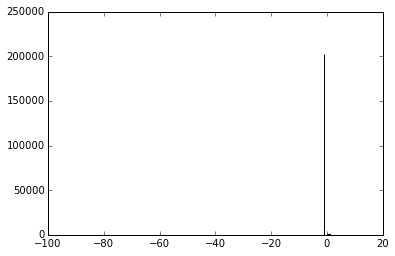

In [125]:
masked_z_hist= plt.hist(masked_z_spec, NBINS)

In [126]:
print stats.mode(ma.masked_outside(pha_data['z_spec'], 0.0, 20.0))

(array([-1.]), array([ 202606.]))


In [127]:
pha_data['z_spec']

array([-1.    , -1.    , -1.    , ...,  1.4196, -1.    , -1.    ])

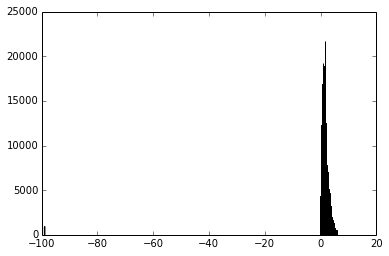

In [128]:
z_peak_hist = plt.hist(pha_data['z_peak'],NBINS)

In [129]:
np.amin(pha_data['z_peak'])

-99.0

In [130]:
np.amin(pha_data['z_spec'])

-99.900000000000006

In [131]:
pha_data['f_F814W']

array([  2.80490000e+03,   1.46050000e+02,   3.79810000e+01, ...,
         1.36200000e+00,  -9.90000000e+01,   1.29930000e+00])

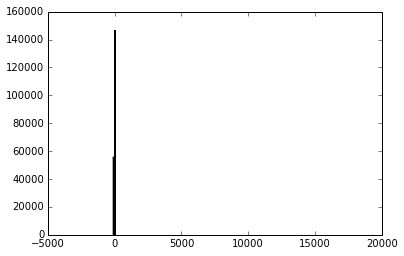

In [132]:
f814hist= plt.hist(pha_data['f_F814W'], 1000)

In [133]:
pha_data['z_spec']

array([-1.    , -1.    , -1.    , ...,  1.4196, -1.    , -1.    ])

In [134]:
masked_zspec= ma.masked_outside(pha_data['z_spec'], 0.0, 15.1)
print masked_zspec

[-- -- -- ..., 1.4196 -- --]


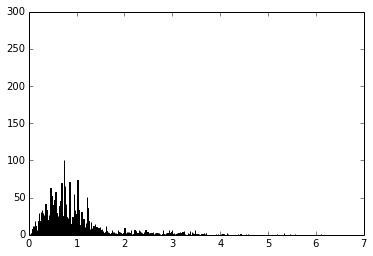

In [135]:
 plotter= plt.hist(masked_zspec.compressed(), 1000)

In [136]:
import scipy
z_VDW_s= (pha_data['z_spec'] >1.6) & (pha_data['z_spec'] <1.8)
print scipy.stats.itemfreq(z_VDW_s)

[[     0 207899]
 [     1     68]]


In [137]:
import scipy
z_VDW_p= (pha_data['z_peak'] >1.6) & (pha_data['z_peak'] <1.8)
print scipy.stats.itemfreq(z_VDW_p)

[[     0 187626]
 [     1  20341]]


In [138]:
pha_data['e_F814W'][pha_data['f_F814W']=='-7.09250000e-01'] #how to access a single value via sql, can also pull up entire row (but without headers)

0.057432999999999998

In [139]:
(pha_data['f_F814W'] == -7.09250000e-01)

array([False, False, False, ..., False, False, False], dtype=bool)

In [140]:
scipy.stats.itemfreq(pha_data['e_F160W'])

array([[ -9.90000000e+01,   1.19000000e+03],
       [  2.11950000e-02,   9.32000000e+02],
       [  2.11960000e-02,   1.00000000e+00],
       ..., 
       [  6.25880000e+02,   1.00000000e+00],
       [  1.33630000e+03,   1.00000000e+00],
       [  8.07500000e+03,   1.00000000e+00]])

In [141]:
f_i= ma.masked_values(pha_data['f_F814W'], -9.90000000e+01 )
f_j= ma.masked_values(pha_data['f_F125W'], -9.90000000e+01 )
f_h= ma.masked_values(pha_data['f_F160W'], -9.90000000e+01 )
fe_i= ma.masked_values(pha_data['e_F814W'], -9.90000000e+01 )
fe_j= ma.masked_values(pha_data['e_F125W'], -9.90000000e+01 )
fe_h= ma.masked_values(pha_data['e_F160W'], -9.90000000e+01 )

In [142]:
print pha_data['f_F160W']
print pha_data['e_F160W'] 

[  2.71880000e+04   2.95310000e+02   7.18020000e+01 ...,  -9.90000000e+01
   1.13220000e+01  -9.90000000e+01]
[   0.32896    1.6266     1.488   ...,  -99.       199.96     -99.     ]


In [143]:
def magab_err(flux, error):
    if error > flux:
        return -1.085
    else:
        return ((-1.085)* (error/flux))

In [144]:
def magab(flux, error):
    if error > flux:
        return (((-2.5)*(np.log10(error))) + 25 )
    else:
        return (((-2.5)*(np.log10(flux))) + 25 )

In [162]:
magfunc = np.vectorize(magab)
magerrorfunc = np.vectorize(magab_err)
i_mag_err = magerrorfunc(f_i, fe_i)
j_mag_err = magerrorfunc(f_j, fe_j)
h_mag_err = magerrorfunc(f_h, fe_h)
i_mag = magfunc (f_i, fe_i)
j_mag = magfunc (f_j, fe_j)
h_mag = magfunc (f_h, fe_h)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [183]:
i_j = i_mag - j_mag
j_h = j_mag - h_mag
err_ij = ((i_mag_err**2) + (j_mag_err**2))**.5
err_jh = ((h_mag_err**2) + (j_mag_err**2))**.5
cut_ij = i_j > (0.44 + err_ij) 
cut_jh = j_h < (-0.44 - err_jh)
phot_use_0 = pha_data['use_phot'] == 0
phot_use_1 = pha_data['use_phot'] == 1
final_cut = cut_ij & cut_jh & phot_use_1
print np.count_nonzero(final_cut == 1)
final_cut_withz = cut_ij & cut_jh & phot_use_1 & (((pha_data['z_spec']>1.55)&(pha_data['z_spec']<1.85)) | ((pha_data['z_peak']>1.55)&(pha_data['z_peak']<1.85)))
print np.count_nonzero(final_cut_withz == 1)
final_cut_withz_field = ((pha_data['field']=='GOODS-S') | (pha_data['field']=='UDS')) & cut_ij & cut_jh & phot_use_1 & (((pha_data['z_spec']>1.55)&(pha_data['z_spec']<1.85)) | ((pha_data['z_peak']>1.55)&(pha_data['z_peak']<1.85)))
print np.count_nonzero(final_cut_withz_field == 1)

254
156
72


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: invalid value encountered in less


In [170]:
colors=['r' if value else 'k' for value in final_cut]
size = [50 if value else 0.1 for value in final_cut]

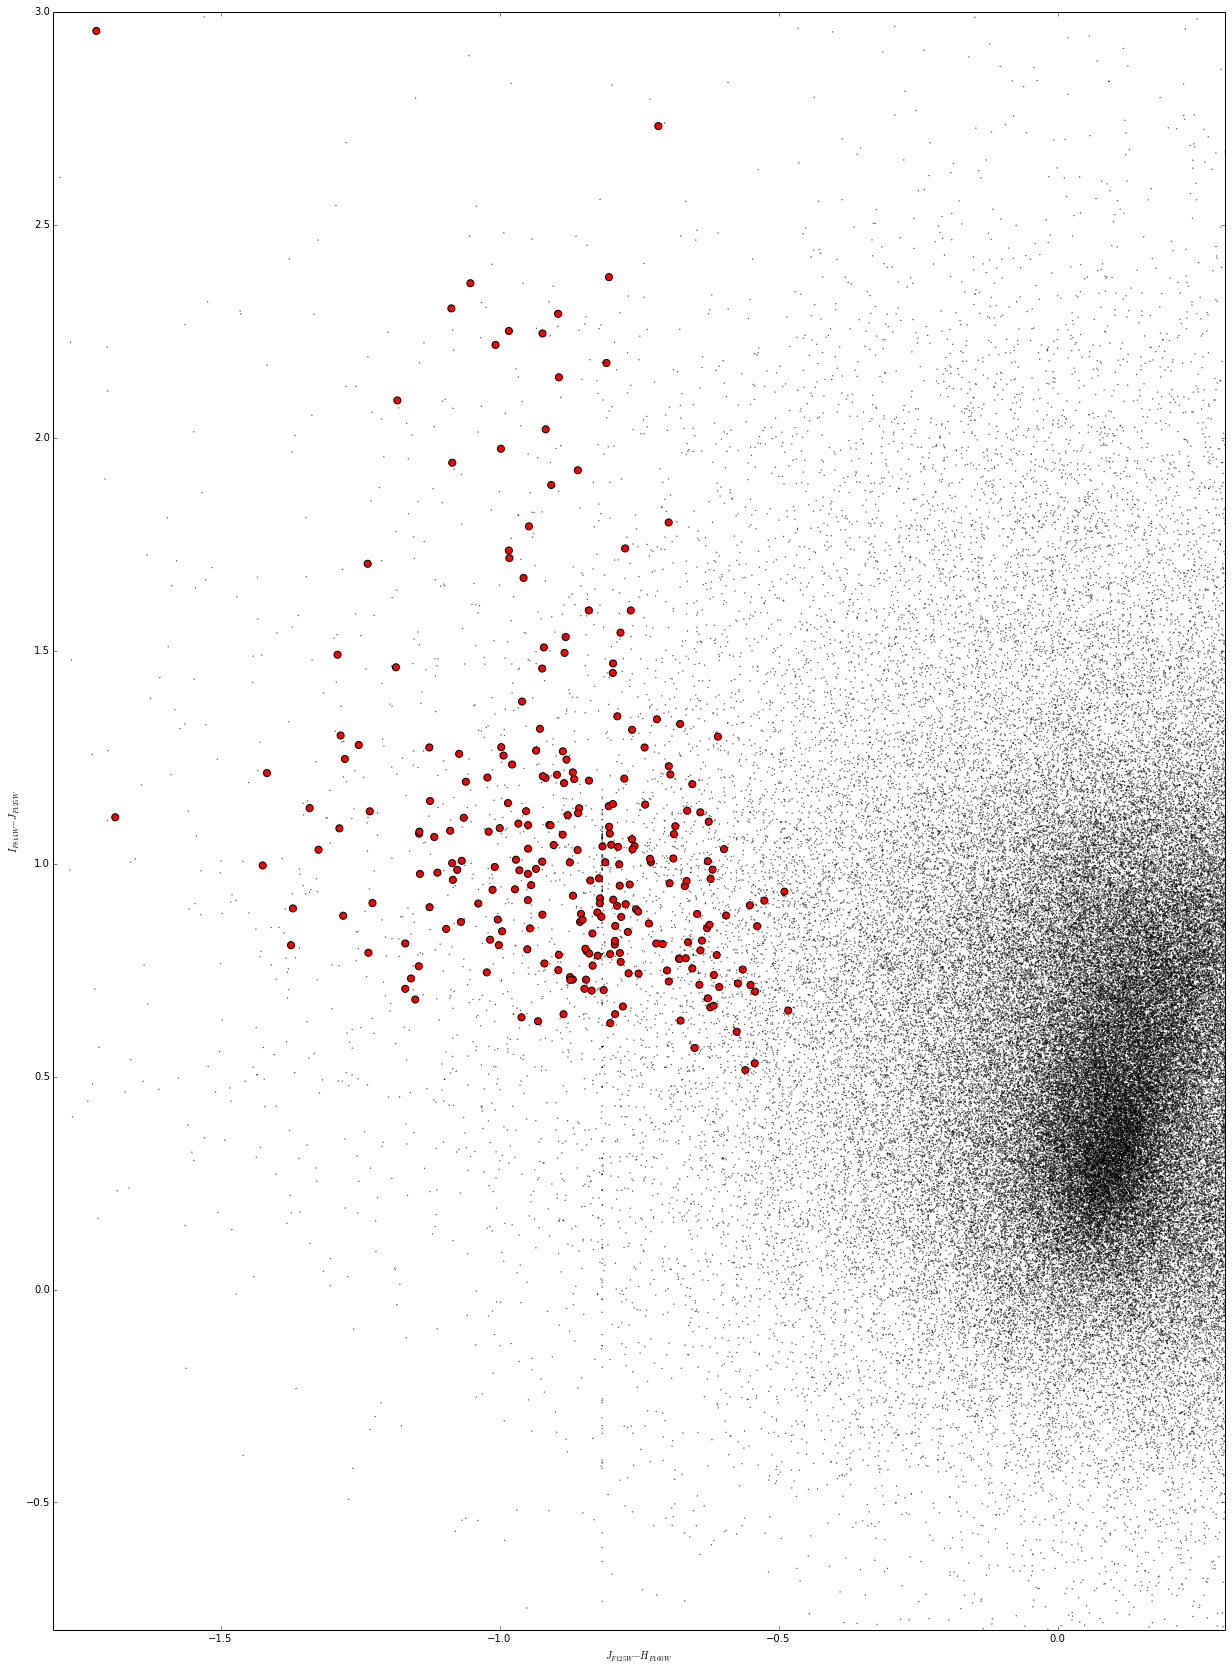

In [174]:
plt.figure(figsize=(21,29))
matplotlib.pyplot.scatter(j_h, i_j, c=colors ,s= size)
plt.xlim(-1.8,0.3)
plt.ylim(-0.8,3)
#plt.gca().invert_yaxis()
plt.ylabel("$I_{F814W} - J_{F125W}$")
plt.xlabel("$J_{F125W} - H_{F160W}$")

In [24]:
print scipy.stats.itemfreq(pha_data['field'])

[['AEGIS' '41200']
 ['COSMOS' '33879']
 ['GOODS-N' '38279']
 ['GOODS-S' '50507']
 ['UDS' '44102']]


In [60]:
a = pha_data['OIII_EQW']
ind = np.argpartition(a, -1000)[-1000:]
#print ind[np.argsort(a[ind])]
print a[ind]

[  5.77419983e+02   5.77989990e+02   5.83669983e+02   5.81369995e+02
   5.84460022e+02   5.81119995e+02   5.83309998e+02   5.80590027e+02
   5.79190002e+02   5.84969971e+02   5.90099976e+02   5.86669983e+02
   5.89609985e+02   5.85229980e+02   5.88799988e+02   5.85049988e+02
   5.86640015e+02   5.89510010e+02   5.85210022e+02   5.88000000e+02
   5.90750000e+02   5.87210022e+02   5.90789978e+02   6.03429993e+02
   5.90859985e+02   6.01219971e+02   6.12150024e+02   6.07419983e+02
   5.93770020e+02   6.08710022e+02   6.10280029e+02   6.02349976e+02
   6.08900024e+02   5.96979980e+02   6.02580017e+02   6.03859985e+02
   6.12090027e+02   5.98109985e+02   5.99190002e+02   6.12940002e+02
   6.11309998e+02   6.08739990e+02   6.10890015e+02   6.12049988e+02
   6.15440002e+02   6.12369995e+02   6.14590027e+02   5.99719971e+02
   6.04020020e+02   6.12299988e+02   5.98140015e+02   5.95840027e+02
   6.12659973e+02   5.98219971e+02   5.93559998e+02   6.18919983e+02
   6.01000000e+02   6.16590027e+02

In [190]:
o1000_cut = (pha_data['OIII_EQW'] > 800) #& (((pha_data['z_spec']>1.55)&(pha_data['z_spec']<1.85)) | ((pha_data['z_peak']>1.55)&(pha_data['z_peak']<1.85)))
print np.count_nonzero(o1000_cut == 1)

662


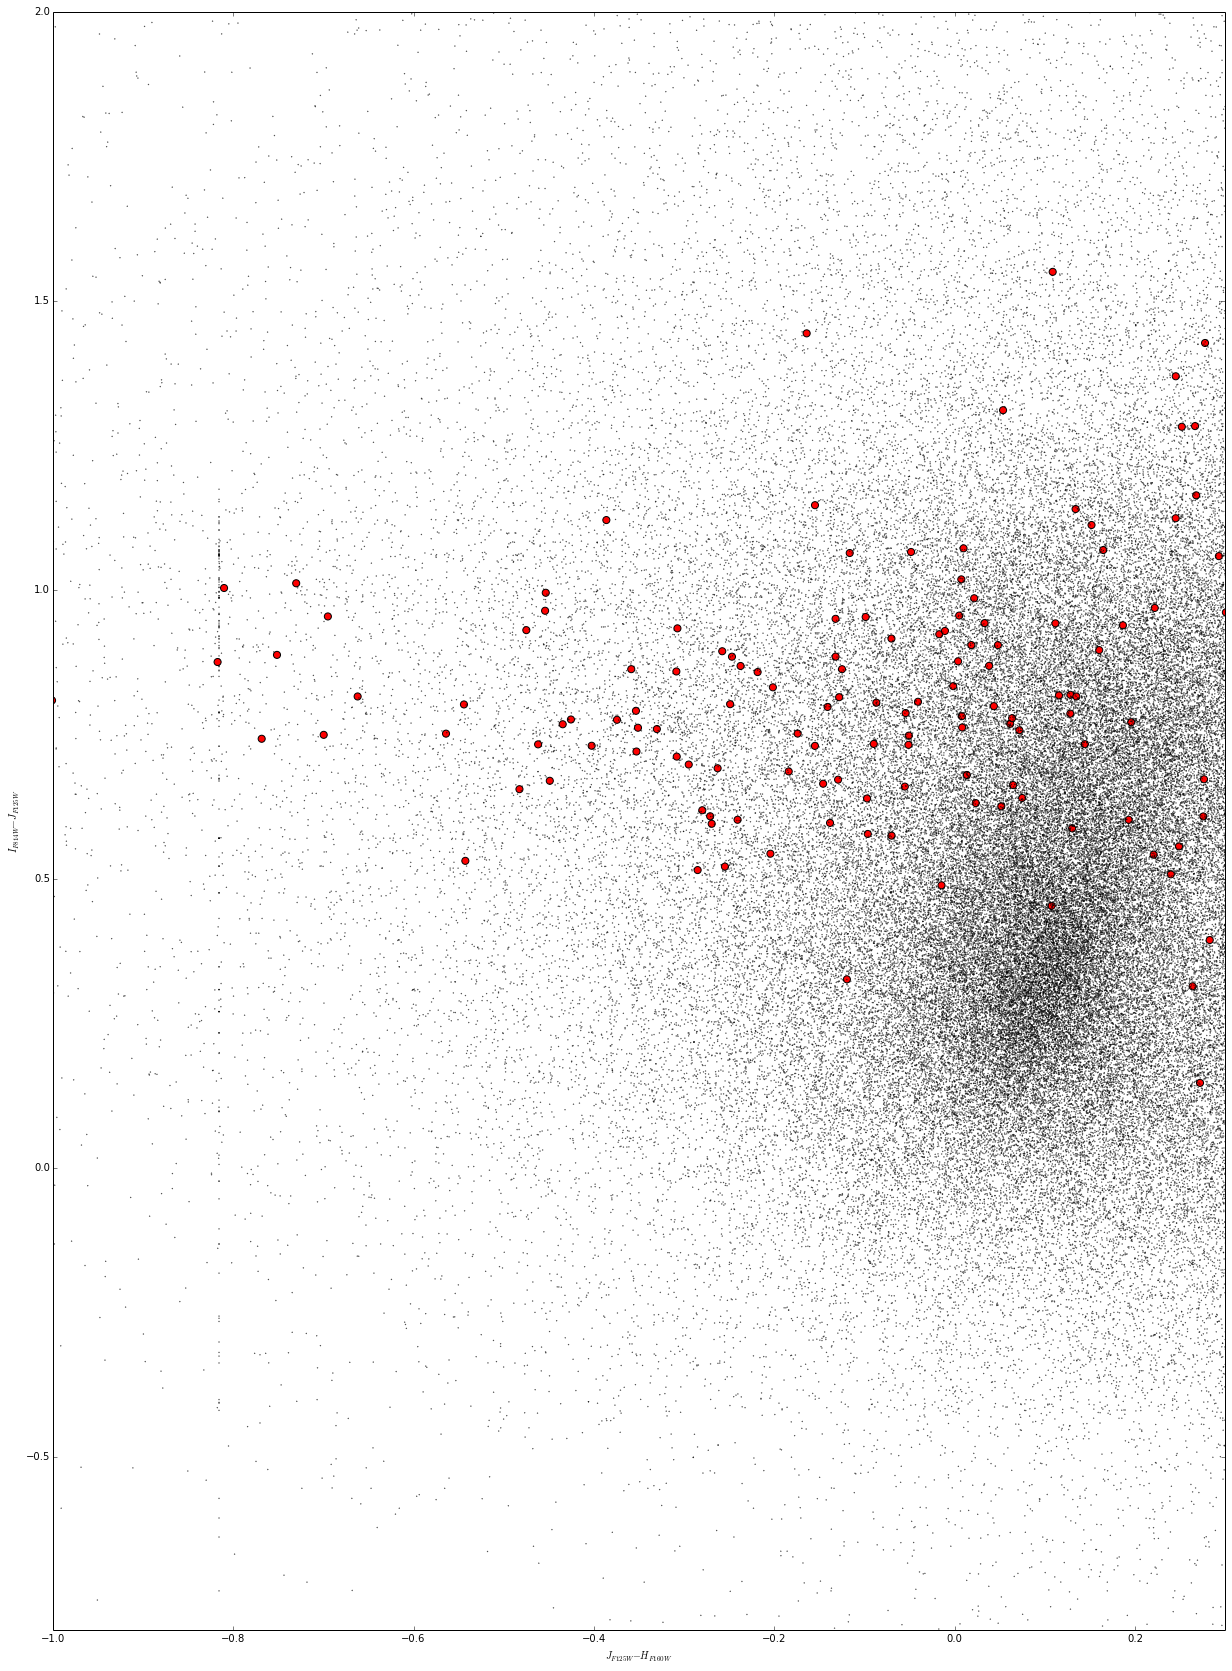

In [189]:
colours=['r' if value else 'k' for value in o1000_cut]
sz = [50 if value else 0.1 for value in o1000_cut]
plt.figure(figsize=(21,29))
matplotlib.pyplot.scatter(j_h, i_j, c=colours ,s= sz)
plt.xlim(-1,0.3)
plt.ylim(-0.8,2)
#plt.gca().invert_yaxis()
plt.ylabel("$I_{F814W} - J_{F125W}$")
plt.xlabel("$J_{F125W} - H_{F160W}$")